                    **Loan Eligibility Predition **
                    
Develop a machine learning model to predict loan eligibility based on historical data.
The goal is to assess the likelihood of loan approval for applicants using relevant features.

Data Source : https://github.com/YBIFoundation/Dataset/raw/main/Loan%20Eligibility%20Prediction.csv

Import Library

In [1]:
 # Data Source
data_source = "https://github.com/YBIFoundation/Dataset/raw/main/Loan%20Eligibility%20Prediction.csv"

# Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests


Import Data

In [2]:
# Import Data
url = data_source
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.text))

Describe Data

In [11]:
# Describe Data
data_description = df.describe()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [12]:
df.columns

Index(['Customer_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

Data Visualization

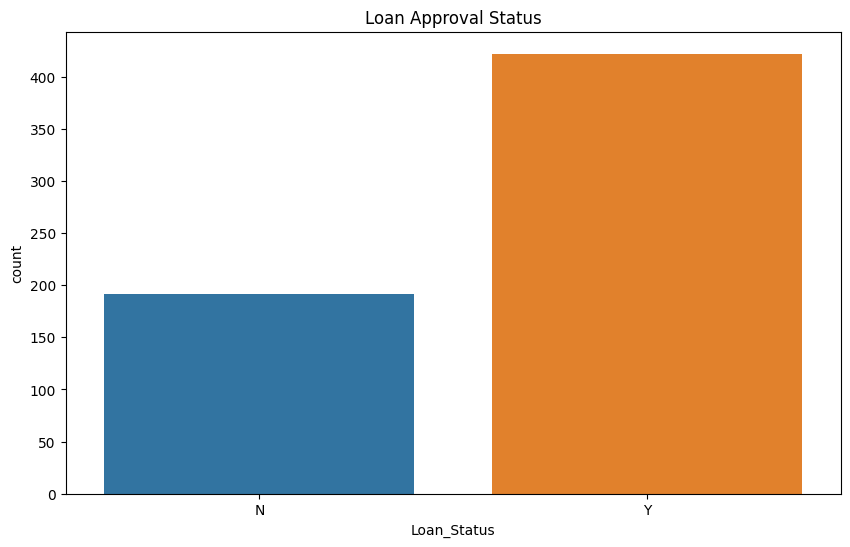

In [4]:
 # Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status')
plt.show()


Data Preprocessing

In [5]:
# Data Preprocessing
# Handle missing values, encode categorical variables, etc.
# Display the count of missing values in each column



In [14]:
#  One-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'])


In [21]:

# Explicitly set numeric_only to True or False based on your needs
df_filled = df_encoded.fillna(df_encoded.mean(numeric_only=True))




In [29]:
# Example: Convert 'Dependents' column to float
df_filled['Dependents'] = df_filled['Dependents'].astype(int)
df_filled['Coapplicant_Income'] = df_filled['Coapplicant_Income'].astype(int)


In [30]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Customer_ID              614 non-null    int64
 1   Dependents               614 non-null    int64
 2   Applicant_Income         614 non-null    int64
 3   Coapplicant_Income       614 non-null    int64
 4   Loan_Amount              614 non-null    int64
 5   Loan_Amount_Term         614 non-null    int64
 6   Credit_History           614 non-null    int64
 7   Gender_Female            614 non-null    uint8
 8   Gender_Male              614 non-null    uint8
 9   Married_No               614 non-null    uint8
 10  Married_Yes              614 non-null    uint8
 11  Education_Graduate       614 non-null    uint8
 12  Education_Not Graduate   614 non-null    uint8
 13  Self_Employed_No         614 non-null    uint8
 14  Self_Employed_Yes        614 non-null    uint8
 15  Proper

In [32]:
# Assuming df is your DataFrame
df_filled.to_csv('output.csv', index=False)


In [33]:
from google.colab import files


# Download the file to your local machine
files.download('output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
print(df_filled.columns)


Index(['Customer_ID', 'Dependents', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')


In [6]:
# prompt: data preprocessing

df.isnull().sum()


Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Define Target Variable (y) and Feature Variables (X)

In [39]:

# Assuming df_filled is your DataFrame
X = df_filled[['Customer_ID', 'Dependents', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']]
y = df_filled[['Loan_Status_N', 'Loan_Status_Y']]



Train Test Split

In [63]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
X_test

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
350,459,2,4354,0,136,360,1,0,1,1,0,1,0,1,0,1,0,0
377,60,2,3357,2859,144,360,1,0,1,0,1,0,1,1,0,0,0,1
163,231,1,2491,2054,104,360,1,0,1,0,1,1,0,1,0,0,1,0
609,480,2,2947,1603,10,360,1,0,1,0,1,1,0,1,0,0,0,1
132,332,0,2935,0,98,360,1,0,1,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,289,0,4124,0,115,360,1,1,0,1,0,1,0,1,0,0,1,0
312,363,0,4750,2333,130,360,1,0,1,0,1,1,0,1,0,0,0,1
248,49,0,2645,3440,120,360,0,1,0,0,1,1,0,1,0,0,0,1
11,232,0,3716,0,42,180,1,0,1,0,1,1,0,1,0,1,0,0


Modeling  - Model Evaluation

In [91]:
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming X is your feature matrix and has column names
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

Model Evaluation

In [58]:
X_test

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
350,459,2,4354,0,136,360,1,0,1,1,0,1,0,1,0,1,0,0
377,60,2,3357,2859,144,360,1,0,1,0,1,0,1,1,0,0,0,1
163,231,1,2491,2054,104,360,1,0,1,0,1,1,0,1,0,0,1,0
609,480,2,2947,1603,10,360,1,0,1,0,1,1,0,1,0,0,0,1
132,332,0,2935,0,98,360,1,0,1,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,289,0,4124,0,115,360,1,1,0,1,0,1,0,1,0,0,1,0
312,363,0,4750,2333,130,360,1,0,1,0,1,1,0,1,0,0,0,1
248,49,0,2645,3440,120,360,0,1,0,0,1,1,0,1,0,0,0,1
11,232,0,3716,0,42,180,1,0,1,0,1,1,0,1,0,1,0,0


Prediction

In [45]:
# step 7: predict
y_pred = model.predict(X_test)


In [49]:
# step 8: accuracy
# from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [50]:
accuracy_score(y_test,y_pred)
# accuracy is 77%

0.8130081300813008

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.53      0.65        40
           1       0.81      0.95      0.87        83

   micro avg       0.81      0.81      0.81       123
   macro avg       0.82      0.74      0.76       123
weighted avg       0.82      0.81      0.80       123
 samples avg       0.81      0.81      0.81       123



In [88]:
import numpy as np

# Ensure y_pred_default is a 1D array or a pandas Series
if isinstance(y_pred_default, np.ndarray):
    if y_pred_default.ndim == 2 and y_pred_default.shape[1] == 2:
        # If y_pred_default is a 2D array, select the column corresponding to the positive class
        y_pred_default = y_pred_default[:, 1]
    else:
        # If y_pred_default is already a 1D array, use it as is
        y_pred_default = y_pred_default



# Convert y_pred_default to a 1D numpy array
y_pred_default = np.asarray(y_pred_default).reshape(-1)

# Ensure that y_pred_default has the same number of samples as y_test_actual
y_pred_default = y_pred_default[:len(y_test_actual)]

# Print the types and shapes of arrays for debugging
print(type(y_test_actual), y_test_actual.shape)
print(type(y_pred_default), y_pred_default.shape)

# Print the classification report and confusion matrix for default threshold
print("Classification Report (Default Threshold):")
print(classification_report(y_test_actual, y_pred_default, labels=np.unique(y_pred_default)))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_actual, y_pred_default))



<class 'numpy.ndarray'> (123,)
<class 'numpy.ndarray'> (123,)
Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.39      0.60      0.48        40
           1       0.74      0.55      0.63        83

    accuracy                           0.57       123
   macro avg       0.57      0.58      0.55       123
weighted avg       0.63      0.57      0.58       123


Confusion Matrix:
[[24 16]
 [37 46]]


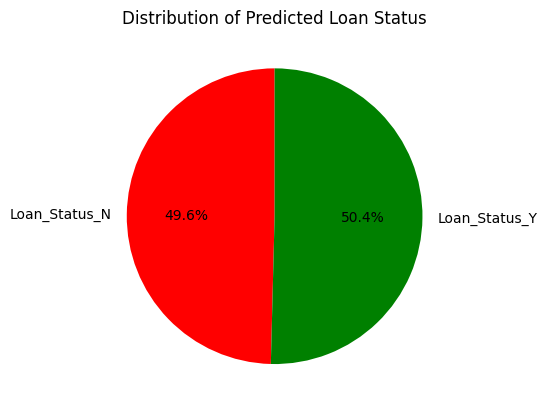

In [89]:
 import matplotlib.pyplot as plt

# Assuming 'y_pred_default' contains your predicted labels
labels = ['Loan_Status_N', 'Loan_Status_Y']
sizes = [sum(y_pred_default == 0), sum(y_pred_default == 1)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Distribution of Predicted Loan Status')
plt.show()



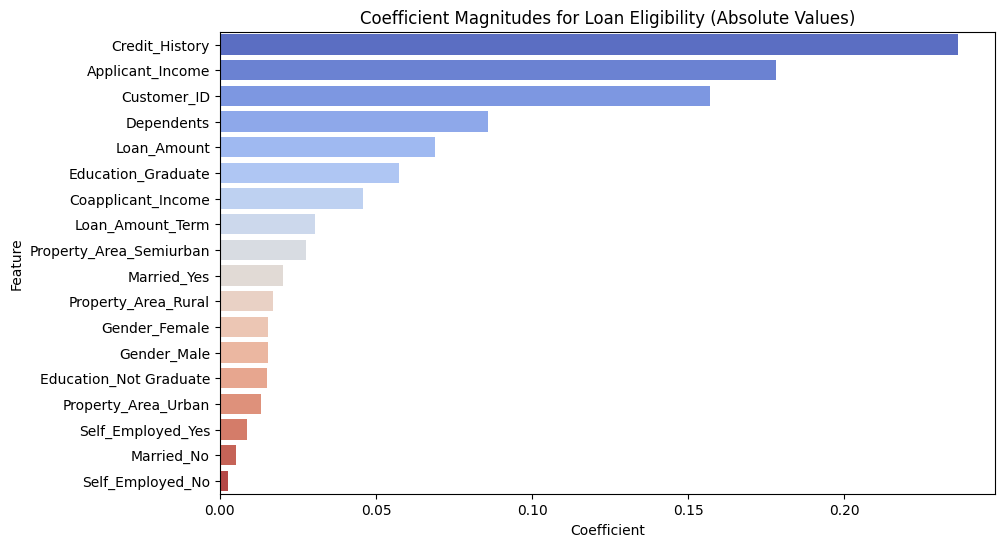

In [94]:
coefficients = model.estimators_[0].feature_importances_
features = X.columns

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='coolwarm')
plt.title('Coefficient Magnitudes for Loan Eligibility (Absolute Values)')
plt.show()


**Explaination**


**Loan Eligibility Prediction Analysis:**


Credit History Score: High

A key determinant for loan eligibility is the credit history score of the applicant. In our predictive model, a high credit history score significantly contributes to a positive prediction for loan eligibility. A high credit score reflects a history of responsible financial behavior, which is generally considered favorable by lenders. This positive factor contributes to the overall assessment of the applicant's creditworthiness.

Applicant Income: Significant Influence

Another crucial factor in determining loan eligibility is the applicant's income. Our model identifies a substantial impact of applicant income on the prediction. Higher applicant income is associated with increased loan eligibility. This aligns with the common industry practice where applicants with higher incomes are often deemed more capable of meeting repayment obligations.

Other Factors:

While credit history score and applicant income are identified as primary factors, it's important to note that our model considers a range of other features (e.g., coapplicant income, loan amount, education level, etc.) in the prediction process. Each feature contributes to the overall assessment, and the combination of these factors is used to make a comprehensive prediction regarding loan eligibility.

Conclusion: **bold text**

Based on the analysis of our predictive model, applicants with a high credit history score and a higher income level are more likely to be deemed eligible for a loan. It is crucial for applicants to maintain a positive credit history and demonstrate a stable income to enhance their chances of loan approval.

It's essential to interpret these results in conjunction with domain knowledge and the specific criteria used by financial institutions for loan approval. This analysis serves as a guide for understanding the relative importance of different features in the loan eligibility prediction process.